# Credit Scoring

**Dataset**: DSDP - creditsetcategorical.csv
<br>
**Features**:
- income: income of the loan applicant
- age: age of the loan applicant
- loan: amount of loan the applicant is requesting
- LTI: loan to yearly income ratio
- default10yr (Target): whether the customer will default his or her loan within 10 years
  - Yes
  - No



### Importing All Necessary Libraries

#### Standard Libraries

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

#### Additional Libraries

In [148]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

#Classification Metric
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#AdaBoost, Random Forest
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

#Support Vector Machine
from sklearn.svm import SVC

#Artificial Neural Network
from sklearn.neural_network import MLPClassifier

#Cross Validation Score
from sklearn.model_selection import cross_val_score

### Data Preparation

#### Load and Explore the Data

In [149]:
# Change directory to the file location of the dataset (Change as needed)
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/DSDP - Week 2/HW/Credit Scoring'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/12NRD37N7hr7rCGwwDWij0WrB9n-HWyAx/DSDP - Week 2/HW/Credit Scoring


In [150]:
# Putting the Data into a Data Frame
df = pd.read_csv('DSDP - creditsetcategorical.csv')
df.head()

income        age         loan       LTI default10yr
0  66155.92510  59.017015  8106.532131  0.122537          No
1  34415.15397  48.117153  6564.745018  0.190752          No
2  57317.17006  63.108049  8020.953296  0.139940          No
3  42709.53420  45.751972  6103.642260  0.142911          No
4  66952.68885  18.584336  8770.099235  0.130990         Yes

The data has been properly loaded.

In [151]:
# Inspect the Shape, Check for Nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   income       2000 non-null   float64
 1   age          2000 non-null   float64
 2   loan         2000 non-null   float64
 3   LTI          2000 non-null   float64
 4   default10yr  2000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 78.2+ KB


The data has 5 columns and 2000 rows. There is no missing data. The target feature has an object data type, while the rest are floats.

In [152]:
# Check for duplicates
df.duplicated().value_counts()

False    2000
dtype: int64

No duplicates found.

In [153]:
# Check the Summary Stats
df.describe(include='all')

income          age          loan          LTI default10yr
count    2000.000000  2000.000000   2000.000000  2000.000000        2000
unique           NaN          NaN           NaN          NaN           2
top              NaN          NaN           NaN          NaN          No
freq             NaN          NaN           NaN          NaN        1717
mean    45331.600018    40.927143   4444.369695     0.098403         NaN
std     14326.327119    13.262450   3045.410024     0.057620         NaN
min     20014.489470    18.055189      1.377630     0.000049         NaN
25%     32796.459720    29.062492   1939.708847     0.047903         NaN
50%     45789.117310    41.382673   3974.719418     0.099437         NaN
75%     57791.281670    52.596993   6432.410625     0.147585         NaN
max     69995.685580    63.971796  13766.051240     0.199938         NaN

From the mean, min, and max, the data needs to be scaled first before training the models.

#### Data Split and Preprocessing

##### Separate the Features from the Target Column

In [154]:
x = df.drop(['default10yr'], axis=1)
y = df['default10yr']

##### Train-Test Split (75/25)

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=20)

##### Scale the Feature Values

In [156]:
#Instantiate the Scaler
scaler = StandardScaler()

#Fit to the TRAIN set
scaler.fit(x_train)

#Apply to the TRAIN set
x_train_s = scaler.transform(x_train)

#Apply to the TEST set
x_test_s = scaler.transform(x_test)

### Training, Validation, and Testing of the Model

In [157]:
# Container of Accuracy Scores for all Models
acc = ['Accuracy']
accuracy = pd.DataFrame(index=acc)

In [158]:
Fold = ['1st Fold', '2nd Fold', '3rd Fold', '4th Fold', '5th Fold', '6th Fold', '7th Fold', '8th Fold', '9th Fold', '10th Fold', 'Average Accuracy']
cross_val_acc = pd.DataFrame(index=Fold)

#### Decision Tree

A decision tree is a decision model for all of the possible outcomes that decision trees might hold. This might include the utility, outcomes, and input costs, that uses a flowchart-like tree structure.

The decision-tree algorithm is classified as a supervised learning algorithm. It can be used with both continuous and categorical output variables.

In [159]:
#Instantiate the Algorithm
dtree = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=20, random_state=20)

#Train the model
dtree.fit(x_train_s,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       random_state=20)

In [160]:
# 10-Fold Cross Validation
dtree_score = cross_val_score(dtree,x_train_s, y_train, cv=10, scoring='accuracy')
dtree_score = np.append(dtree_score, np.average(dtree_score))
cross_val_acc['Decision Tree (%)'] = [i*100 for i in dtree_score]
cross_val_acc

Decision Tree (%)
1st Fold                  98.666667
2nd Fold                 100.000000
3rd Fold                 100.000000
4th Fold                 100.000000
5th Fold                 100.000000
6th Fold                 100.000000
7th Fold                 100.000000
8th Fold                 100.000000
9th Fold                 100.000000
10th Fold                100.000000
Average Accuracy          99.866667

In [161]:
# Predict the Target Value using the Trained Model
dtree_pred = dtree.predict(x_test_s)

In [162]:
#Print the Accuracy of the Model
dtree_acc = accuracy_score(y_test,dtree_pred) * 100
accuracy['Decision Tree (%)'] = [dtree_acc]
print("Accuracy Rate: {:.2f}%".format(dtree_acc))

Accuracy Rate: 99.80%


In [163]:
#Print the Classification Report
print("Classification report for classifier %s:\n%s\n"
      % (dtree, classification_report(y_test, dtree_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       random_state=20):
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       440
         Yes       1.00      0.98      0.99        60

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500




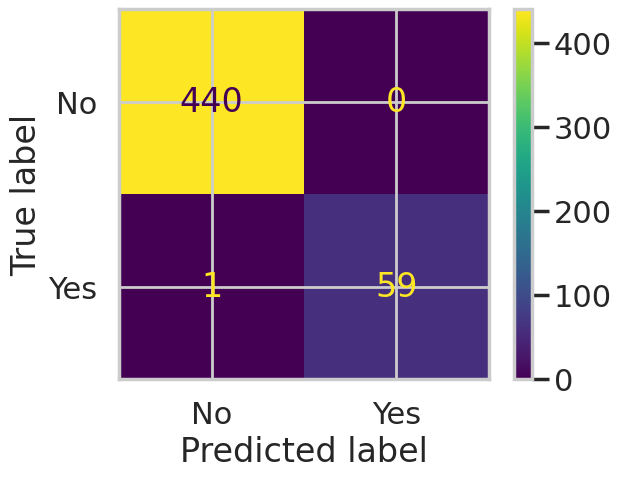

In [164]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, dtree_pred)

#### Naive Bayes

Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, and age. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive.

In [165]:
#Instantiate the Algorithm 
gnb = GaussianNB()

#Train the model
gnb.fit(x_train_s,y_train)

GaussianNB()

In [166]:
# 10-Fold Cross Validation
gnb_score = cross_val_score(gnb, x_train_s, y_train, cv=10, scoring='accuracy')
gnb_score = np.append(gnb_score, np.average(gnb_score))
cross_val_acc['Naive Bayes (%)'] = [i*100 for i in gnb_score]
cross_val_acc

Decision Tree (%)  Naive Bayes (%)
1st Fold                  98.666667        95.333333
2nd Fold                 100.000000        94.000000
3rd Fold                 100.000000        98.000000
4th Fold                 100.000000        99.333333
5th Fold                 100.000000        95.333333
6th Fold                 100.000000        96.000000
7th Fold                 100.000000        94.666667
8th Fold                 100.000000        99.333333
9th Fold                 100.000000        97.333333
10th Fold                100.000000        96.666667
Average Accuracy          99.866667        96.600000

In [167]:
# Predict the Target Value using the Trained Model
gnb_pred = gnb.predict(x_test_s)

In [168]:
#Print the Accuracy of the Model
gnb_acc = accuracy_score(y_test,gnb_pred) * 100
accuracy['Naive Bayes (%)'] = [gnb_acc]
print("Accuracy Rate: {:.2f}%".format(gnb_acc))

Accuracy Rate: 97.60%


In [169]:
#Print the Classification Report
print("Classification report for classifier %s:\n%s\n"
      % (gnb, classification_report(y_test, gnb_pred)))

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

          No       0.98      0.99      0.99       440
         Yes       0.91      0.88      0.90        60

    accuracy                           0.98       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.98      0.98      0.98       500




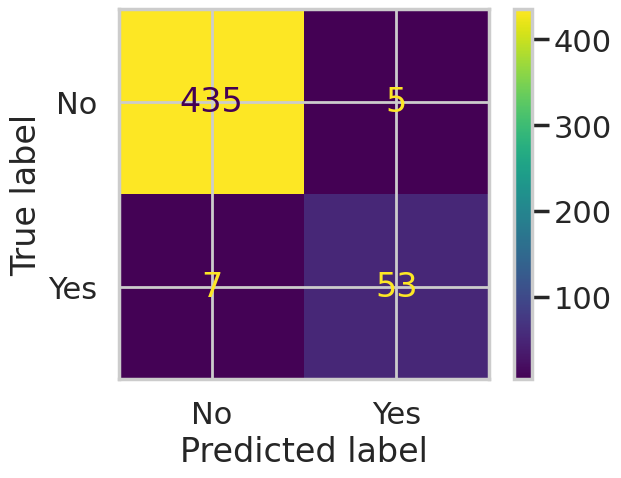

In [170]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, gnb_pred)

#### AdaBoost

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [171]:
#Instantiate the Algorithm 
ada = AdaBoostClassifier(n_estimators = 100, random_state=20)

#Train the model
ada.fit(x_train_s,y_train)

AdaBoostClassifier(n_estimators=100, random_state=20)

In [172]:
# 10-Fold Cross Validation 
ada_score = cross_val_score(ada, x_train_s, y_train, cv=10, scoring='accuracy')
ada_score = np.append(ada_score, np.average(ada_score))
cross_val_acc['AdaBoost (%)'] = [i*100 for i in ada_score]
cross_val_acc

Decision Tree (%)  Naive Bayes (%)  AdaBoost (%)
1st Fold                  98.666667        95.333333    100.000000
2nd Fold                 100.000000        94.000000    100.000000
3rd Fold                 100.000000        98.000000    100.000000
4th Fold                 100.000000        99.333333    100.000000
5th Fold                 100.000000        95.333333     98.666667
6th Fold                 100.000000        96.000000    100.000000
7th Fold                 100.000000        94.666667     99.333333
8th Fold                 100.000000        99.333333    100.000000
9th Fold                 100.000000        97.333333    100.000000
10th Fold                100.000000        96.666667    100.000000
Average Accuracy          99.866667        96.600000     99.800000

In [173]:
# Predict the Target Value using the Trained Model
ada_pred = ada.predict(x_test_s)

In [174]:
#Print the Accuracy of the Model
ada_acc = accuracy_score(y_test,ada_pred) * 100
accuracy['AdaBoost (%)'] = [ada_acc]
print("Accuracy Rate: {:.2f}%".format(ada_acc))

Accuracy Rate: 99.80%


In [175]:
#Print the Classification Report
print("Classification report for classifier %s:\n%s\n"
      % (ada, classification_report(y_test, ada_pred)))

Classification report for classifier AdaBoostClassifier(n_estimators=100, random_state=20):
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       440
         Yes       1.00      0.98      0.99        60

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500




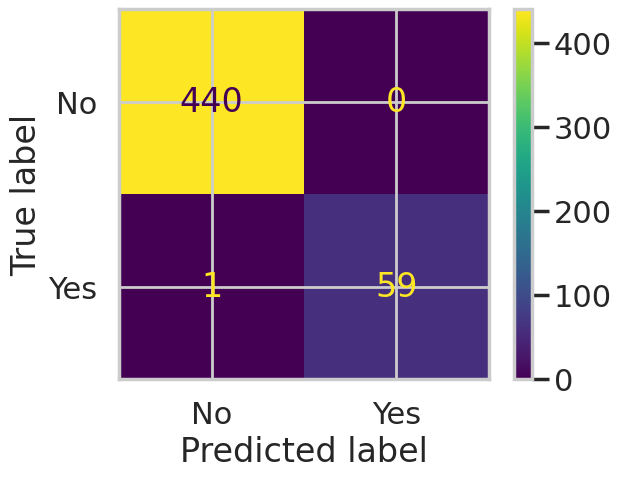

In [176]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, ada_pred)

#### Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [177]:
#Instantiate the Algorithm 
rf = RandomForestClassifier(max_depth=20, random_state=20)

#Train the model
rf.fit(x_train_s,y_train)

RandomForestClassifier(max_depth=20, random_state=20)

In [178]:
# 10-Fold Cross Validation
rf_score = cross_val_score(rf,x_train_s, y_train, cv=10, scoring='accuracy')
rf_score = np.append(rf_score, np.average(rf_score))
cross_val_acc['Random Forest (%)'] = [i*100 for i in rf_score]
cross_val_acc

Decision Tree (%)  Naive Bayes (%)  AdaBoost (%)  \
1st Fold                  98.666667        95.333333    100.000000   
2nd Fold                 100.000000        94.000000    100.000000   
3rd Fold                 100.000000        98.000000    100.000000   
4th Fold                 100.000000        99.333333    100.000000   
5th Fold                 100.000000        95.333333     98.666667   
6th Fold                 100.000000        96.000000    100.000000   
7th Fold                 100.000000        94.666667     99.333333   
8th Fold                 100.000000        99.333333    100.000000   
9th Fold                 100.000000        97.333333    100.000000   
10th Fold                100.000000        96.666667    100.000000   
Average Accuracy          99.866667        96.600000     99.800000   

                  Random Forest (%)  
1st Fold                  99.333333  
2nd Fold                 100.000000  
3rd Fold                 100.000000  
4th Fold                 100.000000  
5th Fold                  99.333333  
6th Fold                 100.000000  
7th Fold                 100.000000  
8th Fold                 100.000000  
9th Fold                 100.000000  
10th Fold                100.000000  
Average Accuracy          99.866667

In [179]:
# Predict the Target Value using the Trained Model
rf_pred = rf.predict(x_test_s)

In [180]:
#Print the Accuracy of the Model
rf_acc = accuracy_score(y_test,rf_pred) * 100
accuracy['Random Forest (%)'] = [rf_acc]
print("Accuracy Rate: {:.2f}%".format(rf_acc))

Accuracy Rate: 99.80%


In [181]:
#Print the Classification Report
print("Classification report for classifier %s:\n%s\n"
      % (rf, classification_report(y_test, rf_pred)))

Classification report for classifier RandomForestClassifier(max_depth=20, random_state=20):
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       440
         Yes       1.00      0.98      0.99        60

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500




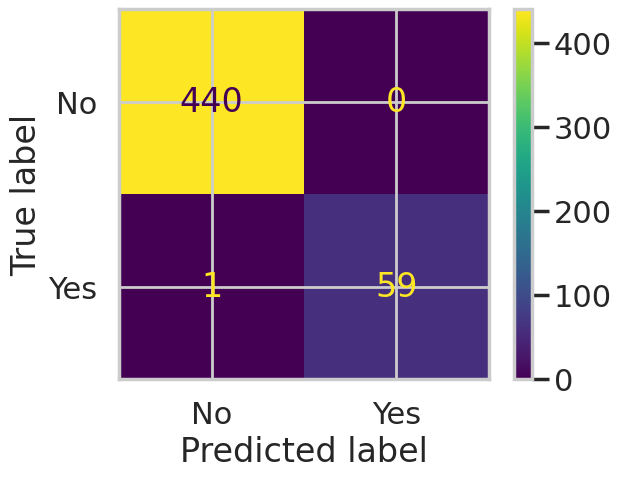

In [182]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)

#### Support Vector Machine (SVM)

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes. Support Vector Classifier (SVC) is the SVM's algorithm used for classification.

In [183]:
#Instantiate the Algorithm 
svc = SVC(gamma='auto', random_state=20)

#Train the model
svc.fit(x_train_s,y_train)

SVC(gamma='auto', random_state=20)

In [184]:
# 10-Fold Cross Validation
svc_score = cross_val_score(svc, x_train_s, y_train, cv=10, scoring='accuracy')
svc_score = np.append(svc_score, np.average(svc_score))
cross_val_acc['SVM (%)'] = [i*100 for i in svc_score]
cross_val_acc

Decision Tree (%)  Naive Bayes (%)  AdaBoost (%)  \
1st Fold                  98.666667        95.333333    100.000000   
2nd Fold                 100.000000        94.000000    100.000000   
3rd Fold                 100.000000        98.000000    100.000000   
4th Fold                 100.000000        99.333333    100.000000   
5th Fold                 100.000000        95.333333     98.666667   
6th Fold                 100.000000        96.000000    100.000000   
7th Fold                 100.000000        94.666667     99.333333   
8th Fold                 100.000000        99.333333    100.000000   
9th Fold                 100.000000        97.333333    100.000000   
10th Fold                100.000000        96.666667    100.000000   
Average Accuracy          99.866667        96.600000     99.800000   

                  Random Forest (%)    SVM (%)  
1st Fold                  99.333333  96.000000  
2nd Fold                 100.000000  96.000000  
3rd Fold                 100.000000  97.333333  
4th Fold                 100.000000  98.666667  
5th Fold                  99.333333  96.666667  
6th Fold                 100.000000  99.333333  
7th Fold                 100.000000  99.333333  
8th Fold                 100.000000  99.333333  
9th Fold                 100.000000  98.666667  
10th Fold                100.000000  99.333333  
Average Accuracy          99.866667  98.066667

In [185]:
# Predict the Target Value using the Trained Model
svc_pred = svc.predict(x_test_s)

In [186]:
#Print the Accuracy of the Model
svc_acc = accuracy_score(y_test,svc_pred) * 100
accuracy['SVM (%)'] = [svc_acc]
print("Accuracy Rate: {:.2f}%".format(svc_acc))

Accuracy Rate: 98.80%


In [187]:
#Print the Classification Report
print("Classification report for classifier %s:\n%s\n"
      % (svc, classification_report(y_test, svc_pred)))

Classification report for classifier SVC(gamma='auto', random_state=20):
              precision    recall  f1-score   support

          No       1.00      0.99      0.99       440
         Yes       0.94      0.97      0.95        60

    accuracy                           0.99       500
   macro avg       0.97      0.98      0.97       500
weighted avg       0.99      0.99      0.99       500




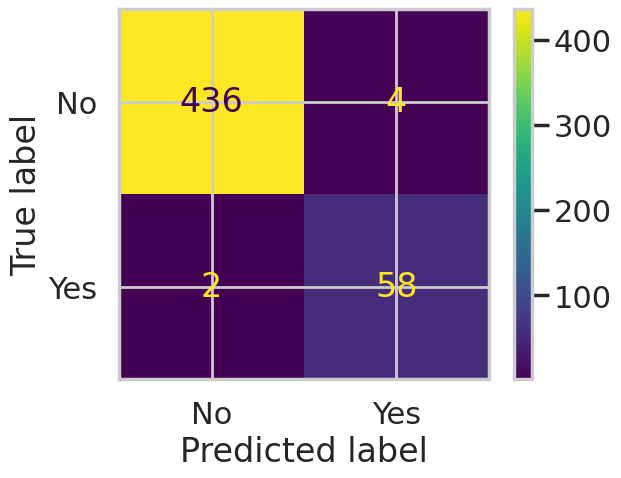

In [188]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, svc_pred)

#### Artificial Neural Network (ANN)

Artificial Neural Network (ANN) comprises of an input layer of neurons, an output layer and one or more hidden layers in between. Also, a fully connected ANN is known as Multi-layer Perceptron (MLP).

Firstly, it computes a dot product of the input and the weight present at the input layer neuron. After that, it sends it to the hidden layer neuron. The input to a hidden layer goes through an activation function and the resulting output of the activation function is used in computing the dot product with the weight present at that neuron.

Consequently, the resulting dot product at hidden layer acts the input of the next layer neurons and the same process repeats until the output layer reaches.

Finally, the neurons at the output layer carry out computations using the activation function present there. Further, the computed results are used in either backpropagation for the purpose of training or they are used for making predictions in case of the model is already trained.

In [189]:
#Instantiate the Algorithm 
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=20)

#Train the model
mlp.fit(x_train_s,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=20,
              solver='lbfgs')

In [190]:
# 10-Fold Cross Validation
mlp_score = cross_val_score(mlp, x_train_s, y_train, cv=10, scoring='accuracy')
mlp_score = np.append(mlp_score, np.average(mlp_score))
cross_val_acc['ANN (%)'] = [i*100 for i in mlp_score]
cross_val_acc

Decision Tree (%)  Naive Bayes (%)  AdaBoost (%)  \
1st Fold                  98.666667        95.333333    100.000000   
2nd Fold                 100.000000        94.000000    100.000000   
3rd Fold                 100.000000        98.000000    100.000000   
4th Fold                 100.000000        99.333333    100.000000   
5th Fold                 100.000000        95.333333     98.666667   
6th Fold                 100.000000        96.000000    100.000000   
7th Fold                 100.000000        94.666667     99.333333   
8th Fold                 100.000000        99.333333    100.000000   
9th Fold                 100.000000        97.333333    100.000000   
10th Fold                100.000000        96.666667    100.000000   
Average Accuracy          99.866667        96.600000     99.800000   

                  Random Forest (%)    SVM (%)     ANN (%)  
1st Fold                  99.333333  96.000000   99.333333  
2nd Fold                 100.000000  96.000000  100.000000  
3rd Fold                 100.000000  97.333333   99.333333  
4th Fold                 100.000000  98.666667   99.333333  
5th Fold                  99.333333  96.666667  100.000000  
6th Fold                 100.000000  99.333333  100.000000  
7th Fold                 100.000000  99.333333  100.000000  
8th Fold                 100.000000  99.333333  100.000000  
9th Fold                 100.000000  98.666667  100.000000  
10th Fold                100.000000  99.333333  100.000000  
Average Accuracy          99.866667  98.066667   99.800000

In [191]:
# Predict the Target Value using the Trained Model
mlp_pred = mlp.predict(x_test_s)

In [192]:
#Print the Accuracy of the Model
mlp_acc = accuracy_score(y_test,mlp_pred) * 100
accuracy['ANN (%)'] = [mlp_acc]
print("Accuracy Rate: {:.2f}%".format(mlp_acc))

Accuracy Rate: 99.60%


In [193]:
#Print the Classification Report
print("Classification report for classifier %s:\n%s\n"
      % (mlp, classification_report(y_test, mlp_pred)))

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=20,
              solver='lbfgs'):
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       440
         Yes       0.98      0.98      0.98        60

    accuracy                           1.00       500
   macro avg       0.99      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500




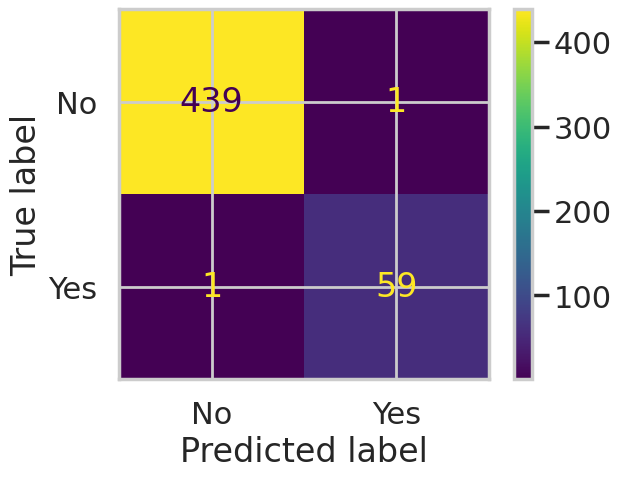

In [194]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, mlp_pred)

#### Tally of Accuracy for all Models

In [195]:
cross_val_acc

Decision Tree (%)  Naive Bayes (%)  AdaBoost (%)  \
1st Fold                  98.666667        95.333333    100.000000   
2nd Fold                 100.000000        94.000000    100.000000   
3rd Fold                 100.000000        98.000000    100.000000   
4th Fold                 100.000000        99.333333    100.000000   
5th Fold                 100.000000        95.333333     98.666667   
6th Fold                 100.000000        96.000000    100.000000   
7th Fold                 100.000000        94.666667     99.333333   
8th Fold                 100.000000        99.333333    100.000000   
9th Fold                 100.000000        97.333333    100.000000   
10th Fold                100.000000        96.666667    100.000000   
Average Accuracy          99.866667        96.600000     99.800000   

                  Random Forest (%)    SVM (%)     ANN (%)  
1st Fold                  99.333333  96.000000   99.333333  
2nd Fold                 100.000000  96.000000  100.000000  
3rd Fold                 100.000000  97.333333   99.333333  
4th Fold                 100.000000  98.666667   99.333333  
5th Fold                  99.333333  96.666667  100.000000  
6th Fold                 100.000000  99.333333  100.000000  
7th Fold                 100.000000  99.333333  100.000000  
8th Fold                 100.000000  99.333333  100.000000  
9th Fold                 100.000000  98.666667  100.000000  
10th Fold                100.000000  99.333333  100.000000  
Average Accuracy          99.866667  98.066667   99.800000

From the result of the 10-Fold Cross-Validation, the Random Forest  and Decision Tree model boast the highest average accuracy with the score of 99.87%.

In [196]:
accuracy

Decision Tree (%)  Naive Bayes (%)  AdaBoost (%)  Random Forest (%)  \
Accuracy               99.8             97.6          99.8               99.8   

          SVM (%)  ANN (%)  
Accuracy     98.8     99.6

From the result of the accuracy metrics, it seems that Decision Tree, AdaBoost, and Random Forest have the highest accuracy with 99.8% accuracy.

### Implementation of the Random Forest Model to the Test File

In [197]:
# Load the test file, and fit into a DataFrame
df_test = pd.read_csv('DSDP - creditsetsample.csv')
df_test

income  age  loan    LTI  default10yr
0   42710   46  6104  0.143          NaN
1   66953   19  8770  0.131          NaN
2   24904   57    15  0.001          NaN

In [198]:
# Separate the target column, and scale the features
x_0 = df_test.drop(['default10yr'], axis = 1)
scaler.fit(x_0)
x_0_s = scaler.transform(x_0)

In [199]:
# Predict using the built model, use Random Forest since it was one of the highest accuracy in validation and testing phase
result = rf.predict(x_0_s)
df_test['default10yr'] = result
df_test

income  age  loan    LTI default10yr
0   42710   46  6104  0.143          No
1   66953   19  8770  0.131         Yes
2   24904   57    15  0.001          No

### Exploratory Data Analysis

In [200]:
df.describe()

income          age          loan          LTI
count   2000.000000  2000.000000   2000.000000  2000.000000
mean   45331.600018    40.927143   4444.369695     0.098403
std    14326.327119    13.262450   3045.410024     0.057620
min    20014.489470    18.055189      1.377630     0.000049
25%    32796.459720    29.062492   1939.708847     0.047903
50%    45789.117310    41.382673   3974.719418     0.099437
75%    57791.281670    52.596993   6432.410625     0.147585
max    69995.685580    63.971796  13766.051240     0.199938

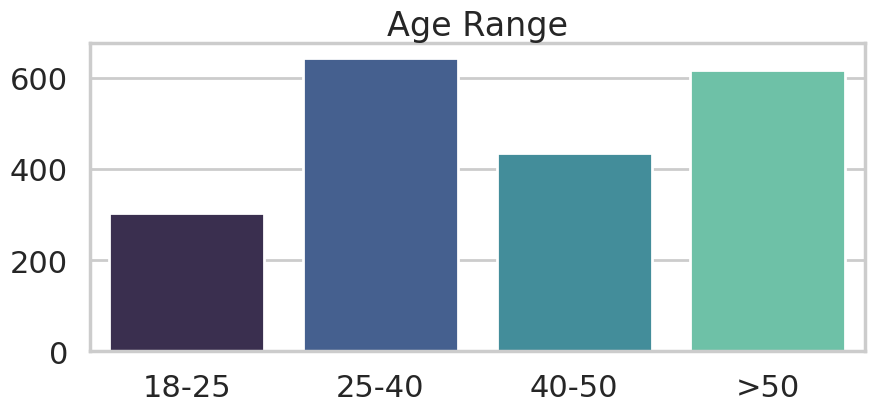

In [201]:
df['age_range'] = df.age.apply(lambda x: '18-25' if (x <= 25) else ('25-40' if (x > 25 and x <= 40) else ('40-50' if (x > 40 and x <= 50) else '>50')))
age_range = df['age_range'].value_counts()
plt.figure(figsize=(10,4), dpi=100)
plt.title('Age Range')
sns.barplot(x = age_range.index, y = age_range.values, order = ['18-25', '25-40', '40-50', '>50'], palette='mako')
plt.show()

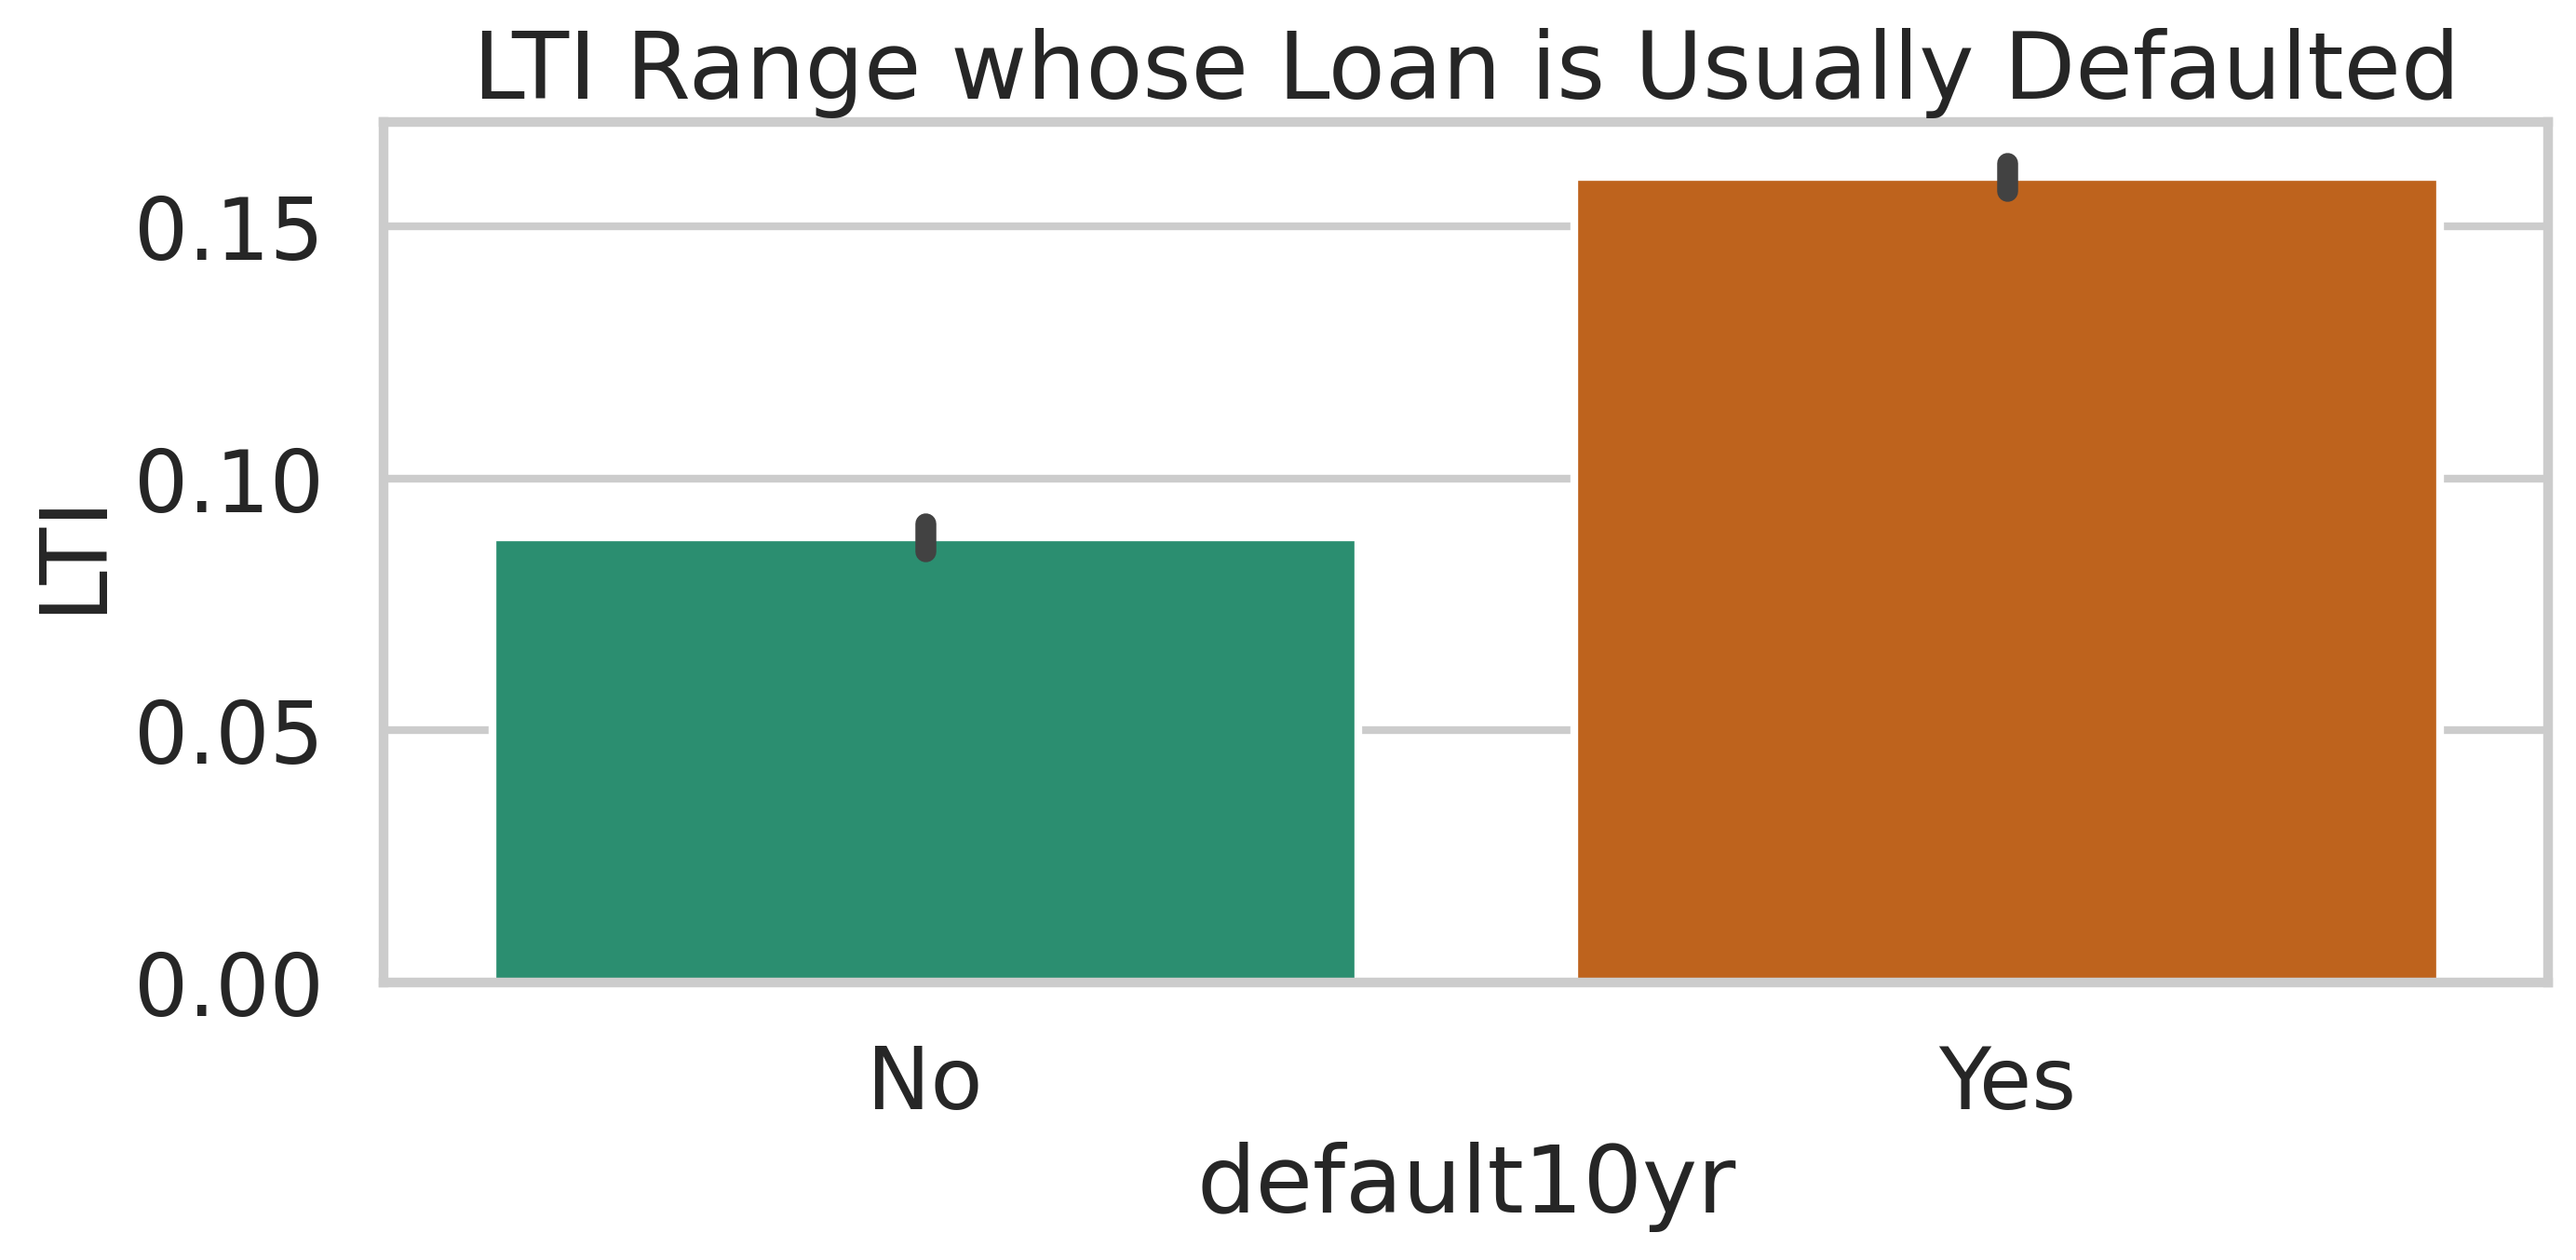

In [202]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('LTI Range whose Loan is Usually Defaulted')
sns.barplot(data=df, x='default10yr', y='LTI', palette='Dark2')
plt.show()

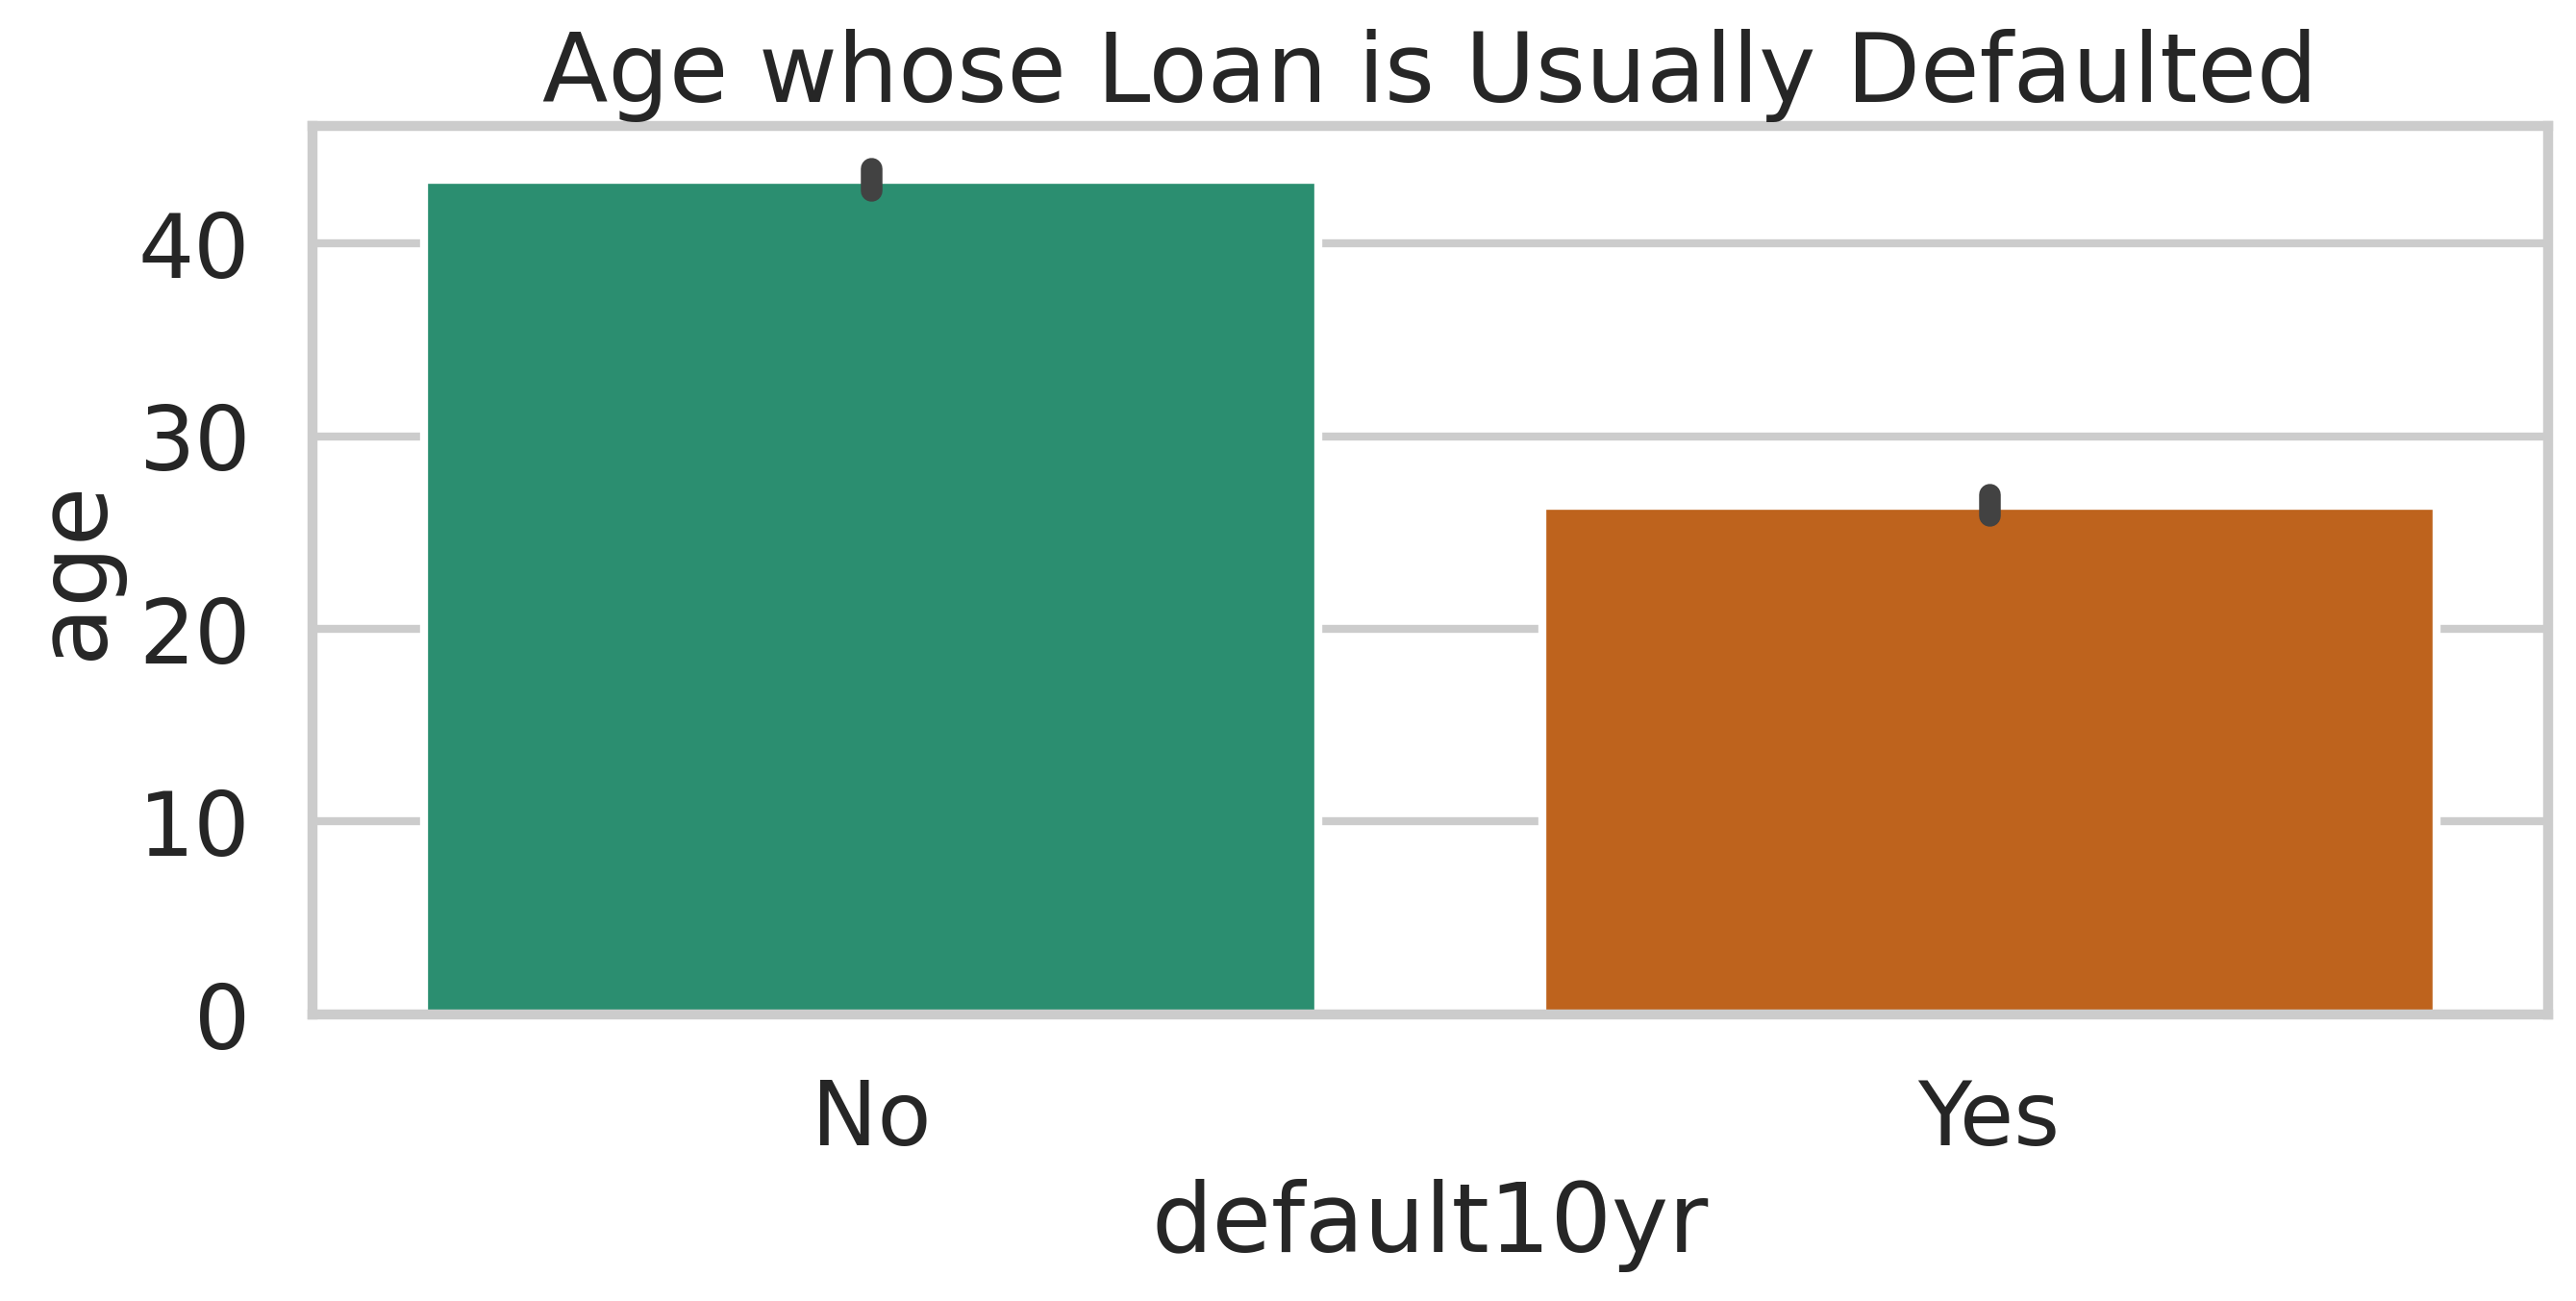

In [203]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Age whose Loan is Usually Defaulted')
sns.barplot(data=df, x='default10yr', y='age', palette='Dark2')
plt.show()

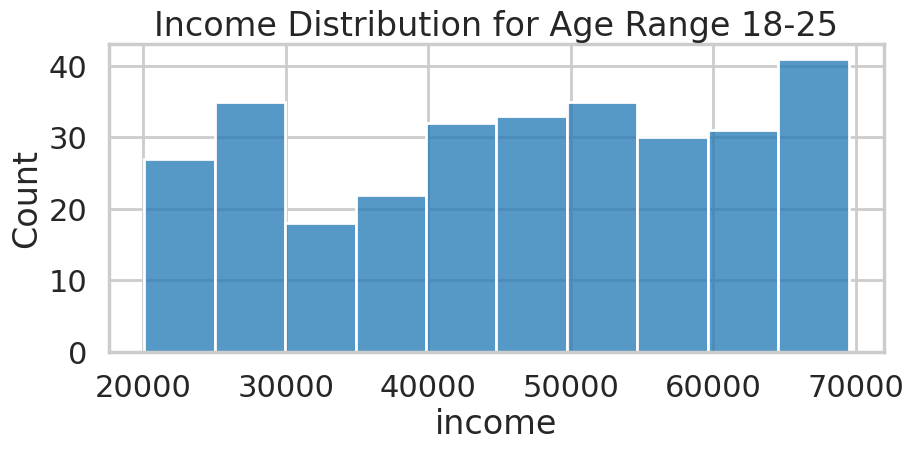

In [204]:
plt.figure(figsize=(10,4))
plt.title('Income Distribution for Age Range 18-25')
df_filtered = df[df.age_range == '18-25']
sns.histplot(df_filtered['income'])
plt.show()

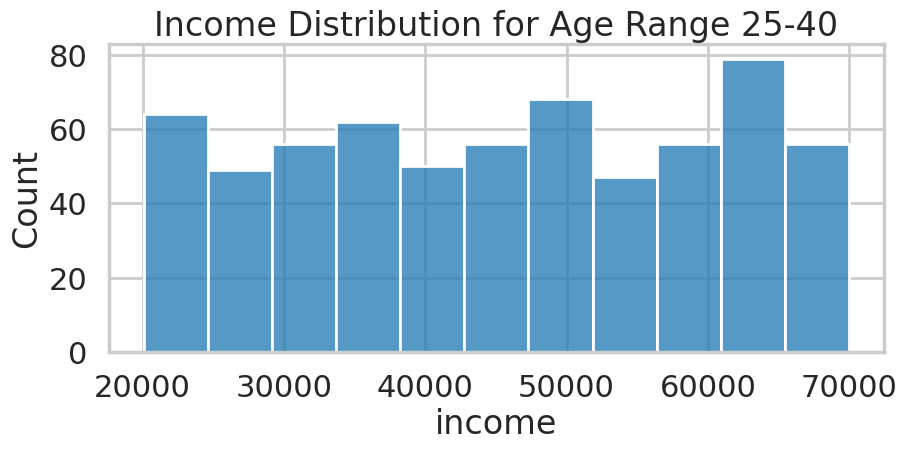

In [205]:
plt.figure(figsize=(10,4))
plt.title('Income Distribution for Age Range 25-40')
df_filtered = df[df.age_range == '25-40']
sns.histplot(df_filtered['income'])
plt.show()

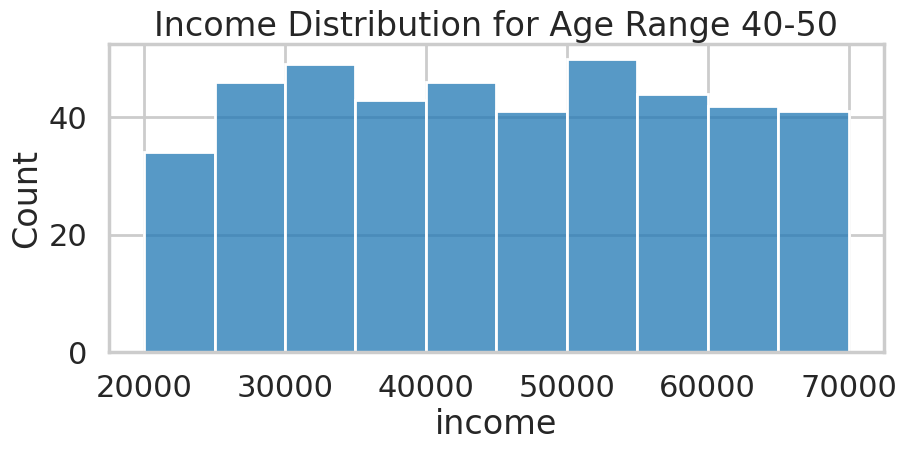

In [206]:
plt.figure(figsize=(10,4))
plt.title('Income Distribution for Age Range 40-50')
df_filtered = df[df.age_range == '40-50']
sns.histplot(df_filtered['income'])
plt.show()

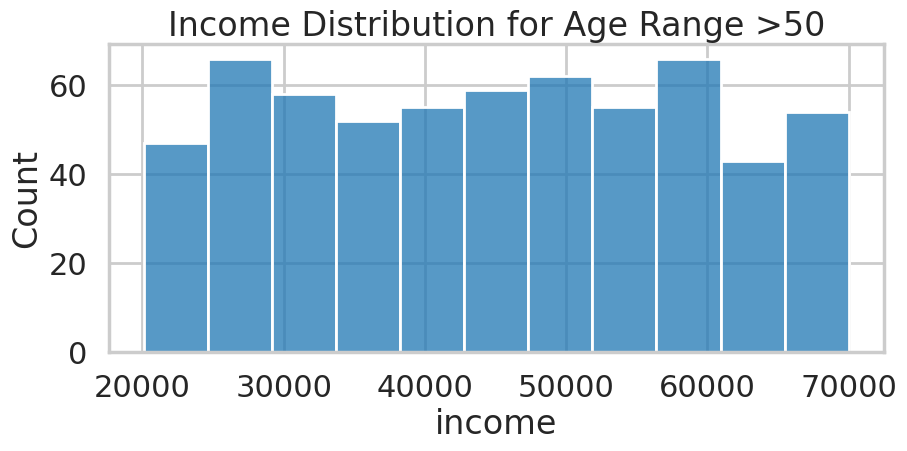

In [207]:
plt.figure(figsize=(10,4))
plt.title('Income Distribution for Age Range >50')
df_filtered = df[df.age_range == '>50']
sns.histplot(df_filtered['income'])
plt.show()

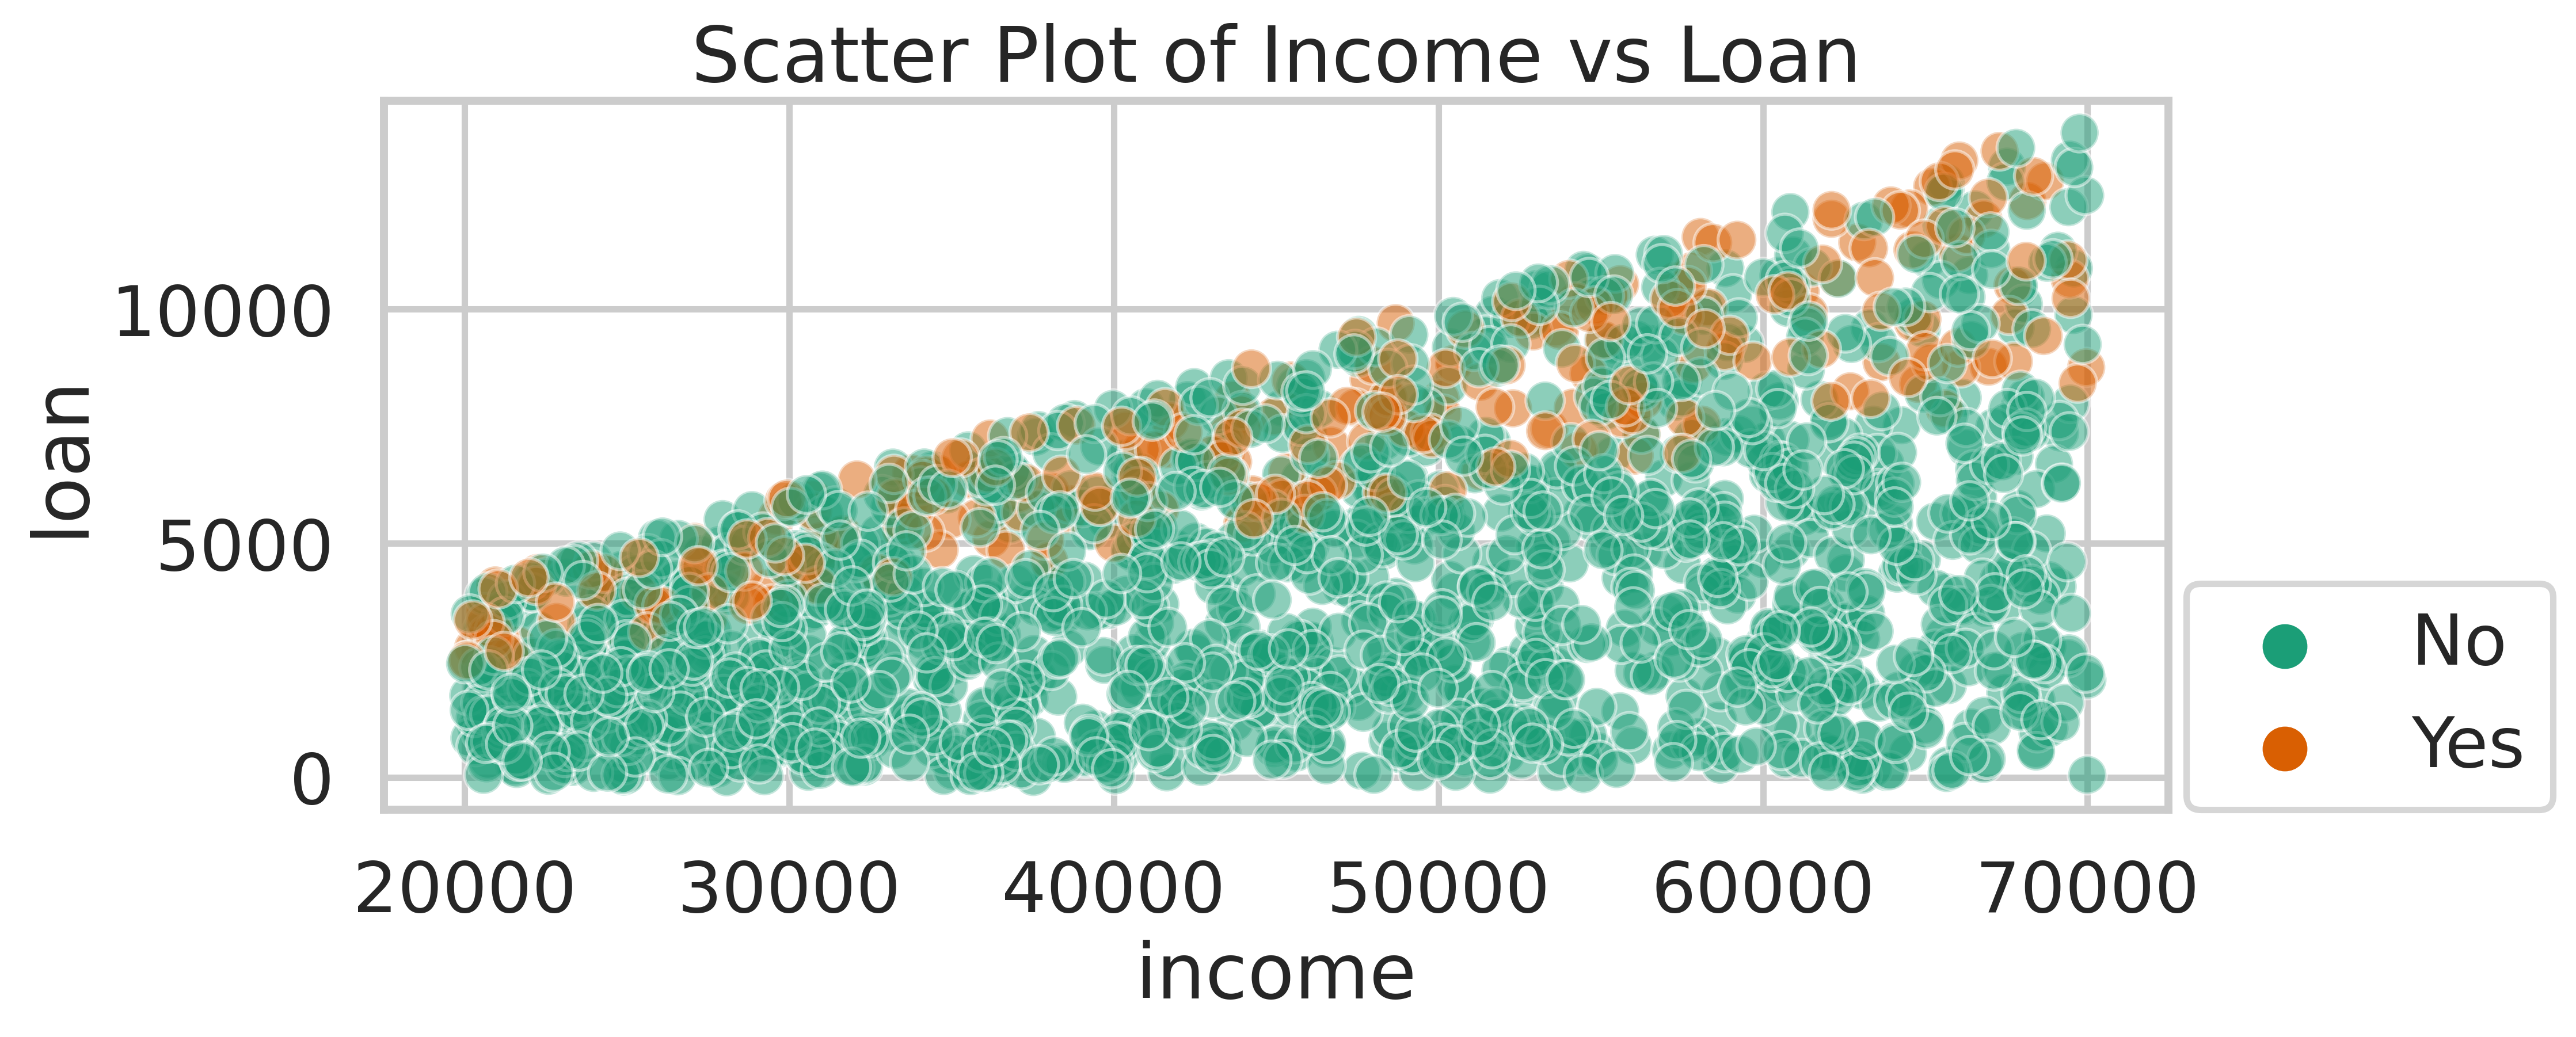

In [208]:
plt.figure(figsize=(10,4), dpi=400)
plt.title('Scatter Plot of Income vs Loan')
sns.scatterplot(data=df,x='income',y='loan', alpha=0.5, hue='default10yr', palette='Dark2')
plt.legend(loc=(1.01,0))
plt.show()

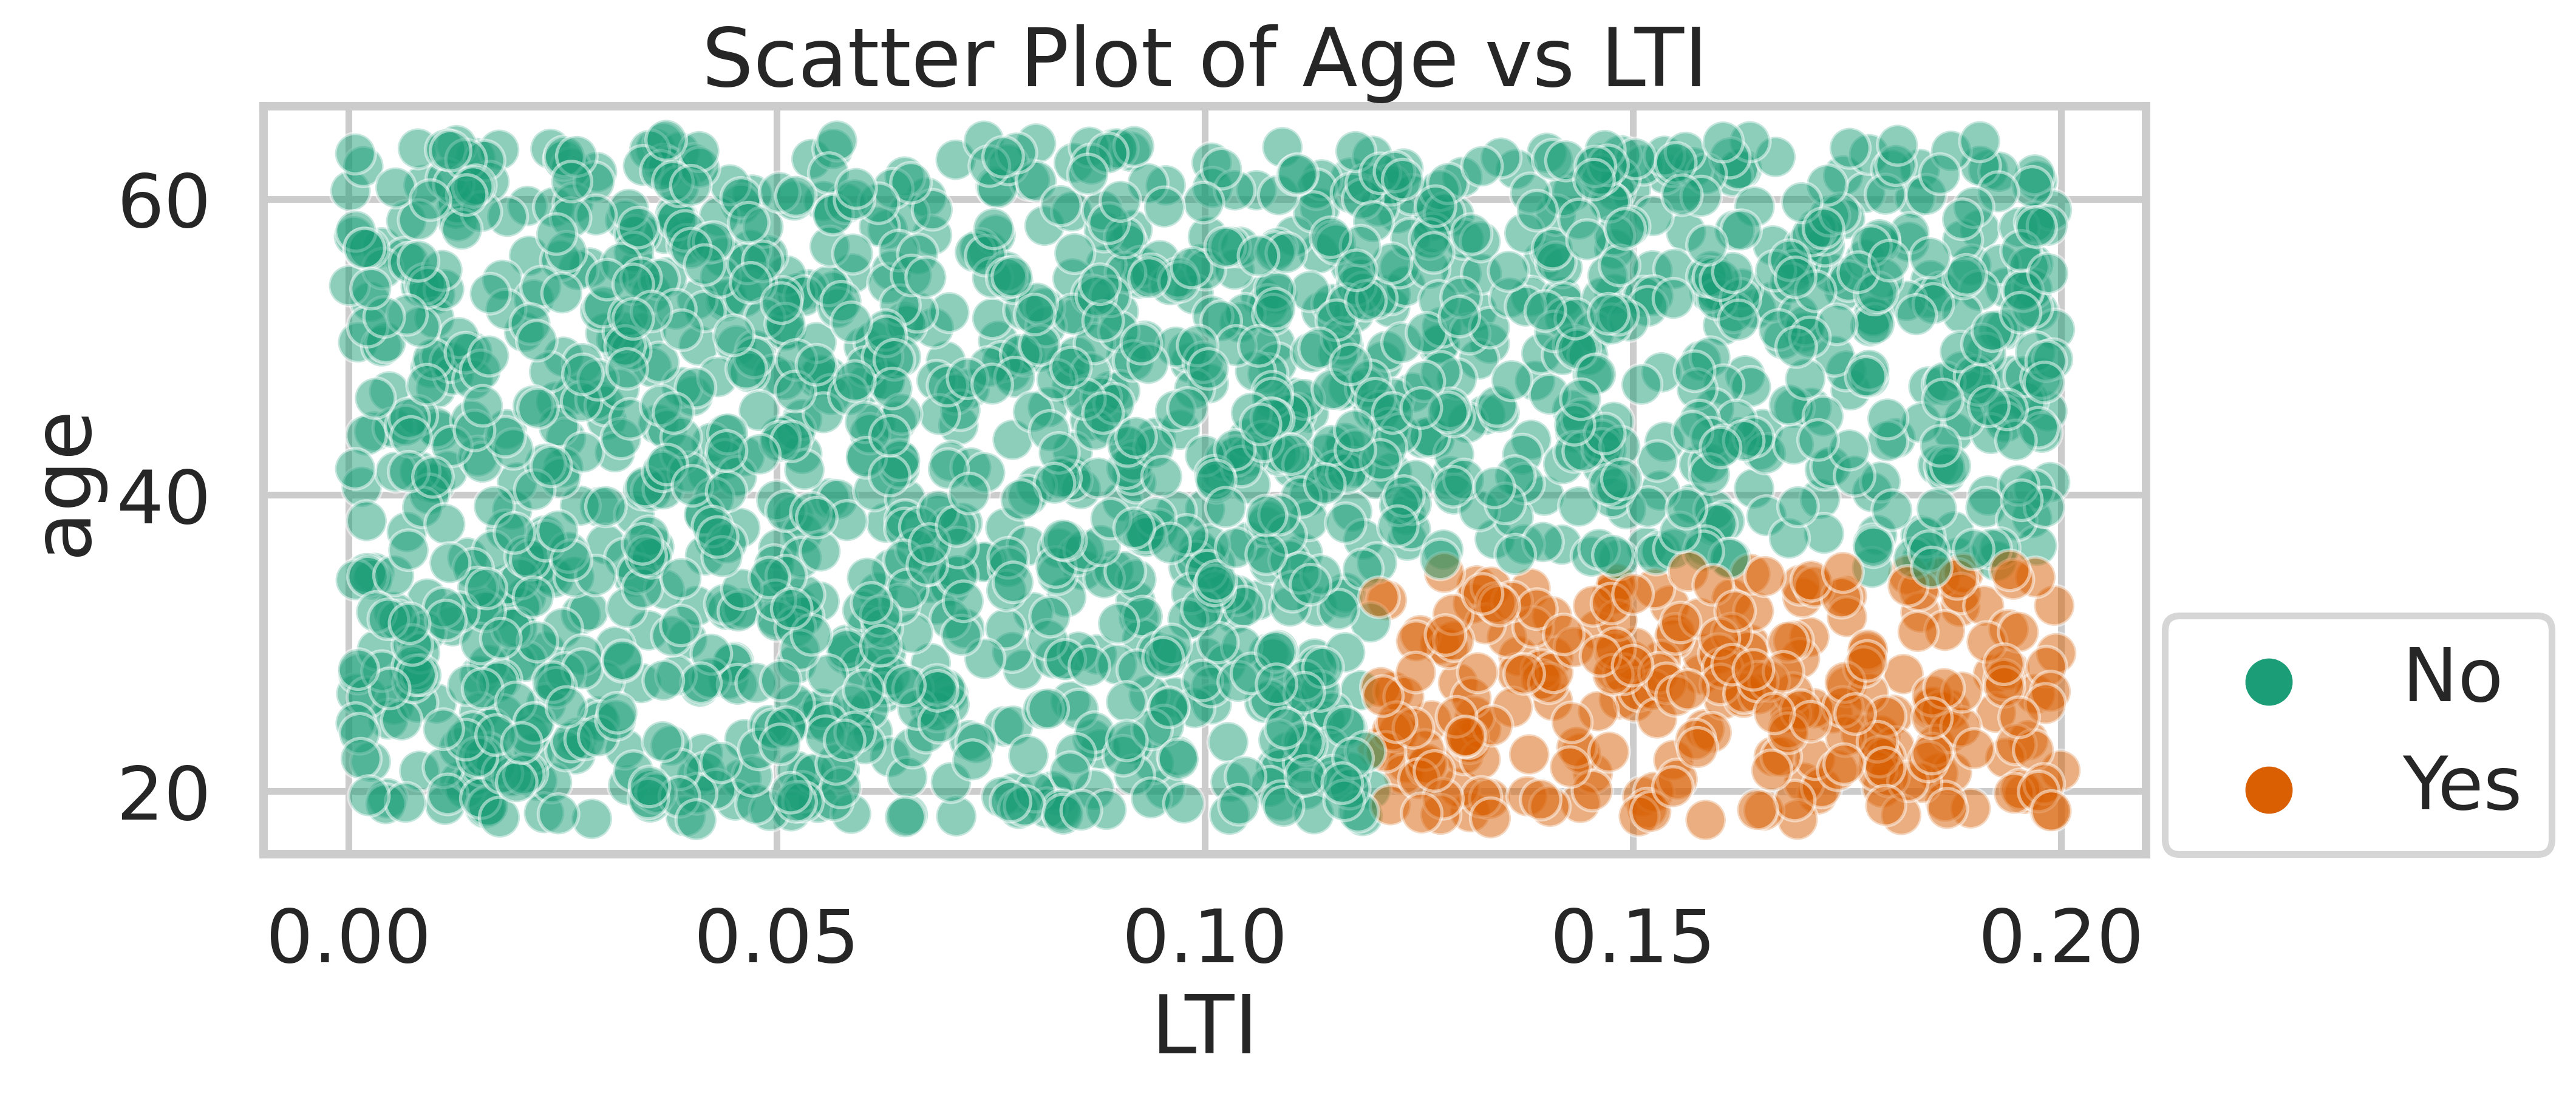

In [209]:
plt.figure(figsize=(10,4), dpi=400)
plt.title('Scatter Plot of Age vs LTI')
sns.scatterplot(data=df,x='LTI',y='age', alpha=0.5, hue='default10yr', palette='Dark2')
plt.legend(loc=(1.01,0))
plt.show()